In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

In [3]:
def computeDifference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

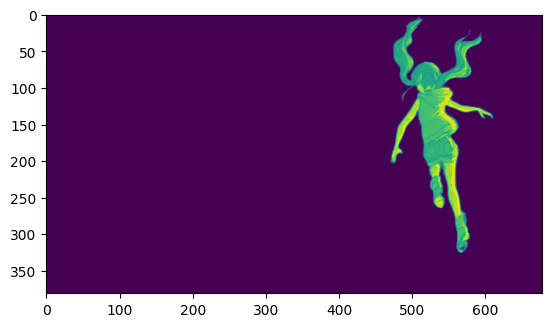

In [8]:
difference_single_channel = computeDifference(bg1_image, ob_image)
plt.imshow(difference_single_channel)

In [9]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

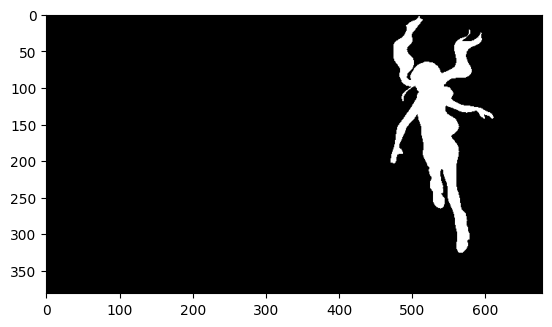

In [10]:
binary_mask = computeBinaryMask(difference_single_channel)
plt.imshow(binary_mask)

In [11]:
def replaceBackGround(bg1_image, bg2_image, ob_image):
    difference_single_channel = computeDifference(bg1_image,ob_image)
    binary_mask = computeBinaryMask(difference_single_channel)

    output = np.where(binary_mask==255, ob_image, bg2_image)

    return output

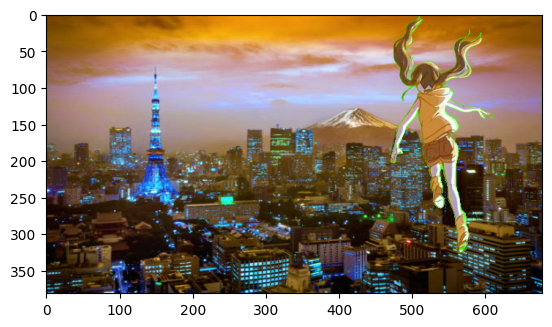

In [12]:
output = replaceBackGround(bg1_image, bg2_image, ob_image)

plt.imshow(output)